In [3]:
###Folders

Input_folder = 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Data/Intermediate_objects/'
Output_folder = 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Results/Ephys/'


'Download data from:  https://doi.org/10.17605/OSF.IO/3D9R2'

'Download data from:  https://doi.org/10.17605/OSF.IO/3D9R2'

In [4]:
##Importing libraries
from joblib import dump, load
import os, sys, pickle, time, re, csv
from collections import defaultdict#

import numpy as np
import pandas as pd

import scipy.stats as st
import math

import matplotlib.pyplot as plt
import seaborn as sns
import collections, numpy

from itertools import groupby
from pingouin import partial_corr
from collections import Counter
import random
from sklearn.linear_model import LogisticRegression
from scipy.stats import circmean
from scipy.ndimage import gaussian_filter1d
import warnings
import statsmodels
from sklearn.preprocessing import MaxAbsScaler

In [5]:
from collections import defaultdict
def rec_dd():
    return defaultdict(rec_dd)

def remove_empty(xx):

    yy= [x for x in xx if len(x) > 0]
    return(yy)

##convert nested dict into array
def dict_to_array(d):
    dictlist=[]
    for key, value in d.items():
        dictlist.append(value)
    return(np.asarray(dictlist))

def rank_repeat(a):
    arr=np.zeros(len(a))
    for n in np.unique(a):
        count=0
        for ii in range(len(a)):
            if a[ii]==n:
                arr[ii]=count
                count+=1

    arr=arr.astype(int)
    return(arr)

def concatenate_complex2(xx):

    ALL_elements=[]
    for ii in np.arange(len(xx)):
        xxii=xx[ii]
        for jj in np.arange(len(xxii)):
            xxiijj=xxii[jj]
            ALL_elements.append(np.asarray(xxiijj))
            
    return(np.asarray(ALL_elements))

def smooth_circular(x,sigma=10):
    return(gaussian_filter1d(np.hstack((x,x,x)),sigma,axis=0)[len(x):int(len(x)*2)])

def polar_plot_stateX2(meanx,upperx,lowerx,ax,repeated,color='black',labels='states',plot_type='line',Marker=False,\
                      fields_booleanx=[], structure_abstract='ABCD',fontsize=20,set_max=False,max_val=1):
    rx = list(meanx)
    theta = list(range(len(rx)))
    thetax = [2 * np.pi * (x/len(rx)) for x in theta]
    r = rx + [rx[0]]
    theta = thetax + [thetax[0]]
    
    #ax=plt.subplot(111, projection='polar')
    
    if Marker==True:
        fields_booleanx=fields_booleanx*(np.max(upperx)+0.1*np.max(upperx))
        fields_boolean=list(fields_booleanx)+[list(fields_booleanx)[0]]

    upper=list(upperx)+[list(upperx)[0]]
    lower=list(lowerx)+[list(lowerx)[0]]
    
    if plot_type=='line':
        ax.plot(theta, r,color=color)
        ax.fill_between(theta, upper, lower, alpha=0.2,color=color)
        if set_max==False:
            ax.set_rmax(np.max(upper)+0.01*np.max(upper))
        else:
            ax.set_rmax(max_val)
            
        if Marker==True:
            ax.plot(theta, fields_boolean,color='black',linestyle='None',marker='.')

    elif plot_type=='bar':
        ax.bar(theta,r,width=5/len(r),color=color)
    elif plot_type=='marker':
        ax.plot(theta, r,color=color)
        
    
    ax.grid(True)
    #ax.set_rorigin(-1)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    if labels=='states':
        if structure_abstract=='ABCD':
            ax.set_xticklabels(['A', '', 'B', '', 'C', '', 'D', ''],fontsize=fontsize)
        elif structure_abstract=='AB' and repeated==False:
            ax.set_xticklabels(['A', '', '', '', 'B', '', '', ''],fontsize=fontsize)
        elif structure_abstract=='AB' and repeated==True:
            ax.set_xticklabels(['A', '', 'B', '', 'A', '', 'B', ''],fontsize=fontsize)
    elif labels == 'angles':
        ax.set_xticklabels(['0', '', '90', '', '180', '', '270', ''],fontsize=fontsize)

def indep_roll(arr, shifts, axis=1):
    """Apply an independent roll for each dimensions of a single axis.

    Parameters
    ----------
    arr : np.ndarray
        Array of any shape.

    shifts : np.ndarray
        How many shifting to use for each dimension. Shape: `(arr.shape[axis],)`.

    axis : int
        Axis along which elements are shifted. 
    """
    arr = np.swapaxes(arr,axis,-1)
    all_idcs = np.ogrid[[slice(0,n) for n in arr.shape]]

    # Convert to a positive shift
    shifts[shifts < 0] += arr.shape[-1] 
    all_idcs[-1] = all_idcs[-1] - shifts[:, np.newaxis]

    result = arr[tuple(all_idcs)]
    arr = np.swapaxes(result,-1,axis)
    return arr 

def bar_plotX(y,name,ymin,ymax,points,pairing,jitt):
    leny=len(y)
    plt.figure(figsize=(leny*(3/2),6))
    
    if ymin =='auto':
        ymin=np.min(np.concatenate(y))
    if ymax =='auto':
        ymax=np.max(np.concatenate(y))
    
    ##bars
    y_mean=((np.zeros(len(y))))
    y_sem=((np.zeros(len(y))))
    for ii in range(0, len(y)):
        ymeanx=np.nanmean(y[ii])
        y_mean[ii]=ymeanx
        ysemx=st.sem(y[ii], nan_policy='omit')
        y_sem[ii]=ysemx
   
    
    xxx=np.linspace(0.15, 0.2+(0.2*(leny-1)), leny)

    xlocations = np.array(range(len(xxx)))
    width=0.2
    plt.bar(xxx, y_mean, width, yerr=y_sem, alpha=1, 
           error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2), align='center')
    
    if points != 'points' and ymin == 'auto':
        ymin=np.min(y_mean-y_sem) #-np.max(y_sem)
        ymax=np.max(y_mean+y_sem) #+np.max(y_sem)
    
    #if ymin>0:
    #    ymin=0
    plt.ylim(ymin-(0.05*(ymax-ymin)),ymax+(0.05*(ymax-ymin)))
    plt.xlim(0,np.max(xxx)+0.15)
    
    

    ###points and lines
    if points == 'points':
        yyALL=[]
        for ii in range(0, len(y)):
            yy=np.column_stack((y[ii],np.repeat(xxx[ii],len(y[ii]))))
            yyALL.append(yy)

        xy=np.vstack((yyALL))
        jittered=rand_jitterX(xy[:,1],jitt)

        if pairing == 'paired':
            for ii in range(0, leny):
                x1=np.split(jittered,len(y))[ii]
                if ii == 0:
                    x1_all=x1
                else:
                    x1_all=np.column_stack((x1_all,x1))

            for jj in range(0,np.shape(y)[1]):
                yyyy=np.asarray(y)[:,jj]
                plt.plot(x1_all[jj],yyyy, color='gray')
        plt.plot(jittered,xy[:,0],'o',markersize=7,color='white',markeredgecolor='black')
    
    if name != 'none':
        plt.savefig(name)
    
    #plt.show()

###function to plot scatter plots (e.g. comparing assembly strength at correct vs incorrect dispensers)
def plot_scatter(x,y,name='none'):
    plt.plot(x, y, 'o')
    z= [-10000, 0, 10000]
    plt.plot(z,z,'k--')

    xy=np.hstack((x,y))

    xmin=min(xy)-np.mean(xy)*0.1
    xmax=max(xy)+np.mean(xy)*0.1
    ymin=min(xy)-np.mean(xy)*0.1
    ymax=max(xy)+np.mean(xy)*0.1

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    
    plt.gca().set_aspect('equal', adjustable='box')
    
    if name != 'none':
        plt.savefig(name)
    plt.show()
    

    
def circular_sem(a):
    if len(np.shape(a))==2:
        sem_=np.rad2deg(np.hstack(([st.circvar(remove_nan(a[:,ii]))/np.sqrt(len(remove_nan(a[:,ii])))\
                               for ii in range(len(a.T))])))
    elif len(np.shape(a))==1:
        sem_=np.rad2deg(st.circvar(remove_nan(a))/np.sqrt(len(remove_nan(a))))
        
    return(sem_)
    
def non_repeat_ses_maker(mouse_recday):
    Tasks=np.load(Input_folder+'Task_data_'+mouse_recday+'.npy',allow_pickle=True)
    num_trials_day=np.load(Input_folder+'Num_trials_'+mouse_recday+'.npy',\
                                        allow_pickle=True)

    non_repeat_bool_all=[]
    for ses_ind in np.arange(len(Tasks)):
        if ses_ind==0:
            non_repeat_bool=True
        else:
            num_prev_repeats=np.sum([np.array_equal(Tasks[ses_ind],Tasks[:ses_ind][jj])\
                                     for jj in range(len(Tasks[:ses_ind]))])
            if num_prev_repeats==0:
                non_repeat_bool=True
            else:
                non_repeat_bool=False

        non_repeat_bool_all.append(non_repeat_bool)
    non_repeat_bool_all=np.hstack((non_repeat_bool_all))
    num_trials_bool=num_trials_day>0
    non_repeat_ses_bool=np.logical_and(non_repeat_bool_all,num_trials_bool)

    non_repeat_ses=np.where(non_repeat_ses_bool==True)[0]
    return(non_repeat_ses)

def two_proportions_test(success_a, size_a, success_b, size_b):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its zscore and pvalue
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
    
    Returns
    -------
    zscore : float
        test statistic for the two proportion z-test

    pvalue : float
        p-value for the two proportion z-test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    prop_pooled = (success_a + success_b) / (size_a + size_b)
    var = prop_pooled * (1 - prop_pooled) * (1 / size_a + 1 / size_b)
    zscore = np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - stats.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue

def partition(alist, indices):
    return np.asarray([np.asarray(alist[i:j]) for i, j in zip(indices[:-1], indices[1:])])

def normalise(xx,num_bins=90,take_max=False):
    lenxx=len(xx)
    if lenxx<num_bins:
        xx=np.repeat(xx,10)/10
        lenxx=lenxx*10
    indices_polar=np.arange(lenxx)
    if take_max==True:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'max', bins=num_bins)[0]
    else:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'mean', bins=num_bins)[0]
    return(normalized_xx)

def raw_to_norm(raw_neuron,Trial_times_conc,num_states=4,return_mean=True,smoothing=True,\
                take_max=False,smoothing_sigma=10):
    raw_neuron_split=remove_empty(partition(list(raw_neuron),list(Trial_times_conc)))
    if len(raw_neuron_split)%num_states!=0:
        raw_neuron_split=raw_neuron_split[:len(raw_neuron_split)-len(raw_neuron_split)%num_states]
    
    if take_max==True:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii],take_max=True)\
                                          for ii in np.arange(len(raw_neuron_split))])
    else:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii]) for ii in np.arange(len(raw_neuron_split))])
    
    Actual_norm=(raw_neuron_split_norm.reshape(len(raw_neuron_split_norm)//num_states,\
                                               len(raw_neuron_split_norm[0])*num_states))
    
    if return_mean==True:
        Actual_norm_mean=np.nanmean(Actual_norm,axis=0)
        if smoothing==True:
            Actual_norm_smoothed=smooth_circular(Actual_norm_mean,sigma=smoothing_sigma)
            return(Actual_norm_smoothed)
        else:
            return(Actual_norm_mean)
    else:
        return(Actual_norm)
    
def remove_nan(x):
    x=x[~np.isnan(x)]
    return(x)

def unique_nosort(a):
    indexes = np.unique(a, return_index=True)[1]
    return(np.asarray([a[index] for index in sorted(indexes)]))

def one_hot_encode(x,length):
    array=np.zeros((len(x),length))
    for entry in np.arange(len(x)):
        if ~np.isnan(x[entry]):
            array[entry,int(x[entry])]=1
    return(array)

In [6]:
##Defining Task grid
from scipy.spatial import distance_matrix
from itertools import product
len_side=3
x=np.arange(len_side)
S=np.asarray(list(product(x, x)))
Task_matrix_blank=np.zeros((len_side,len_side))

A = [[-1, 0], [1, 0], [0, 1], [0, -1]]

###shortest distances 
from scipy.spatial import distance_matrix
from itertools import product
x=(0,1,2)
Task_grid=np.asarray(list(product(x, x)))

mapping_pyth={2:2,5:3,8:4}

distance_mat_raw=distance_matrix(Task_grid, Task_grid)
len_matrix=len(distance_mat_raw)
distance_mat=np.zeros((len_matrix,len_matrix))
for ii in range(len_matrix):
    for jj in range(len_matrix):
        if (distance_mat_raw[ii,jj]).is_integer()==False:
            hyp=int((distance_mat_raw[ii,jj])**2)
            distance_mat[ii,jj]=mapping_pyth[hyp]
        else:
            distance_mat[ii,jj]=distance_mat_raw[ii,jj]
mindistance_mat=distance_mat.astype(int)


abstract_structure='ABCD'

In [7]:
mindistance_mat

array([[0, 1, 2, 1, 2, 3, 2, 3, 4],
       [1, 0, 1, 2, 1, 2, 3, 2, 3],
       [2, 1, 0, 3, 2, 1, 4, 3, 2],
       [1, 2, 3, 0, 1, 2, 1, 2, 3],
       [2, 1, 2, 1, 0, 1, 2, 1, 2],
       [3, 2, 1, 2, 1, 0, 3, 2, 1],
       [2, 3, 4, 1, 2, 3, 0, 1, 2],
       [3, 2, 3, 2, 1, 2, 1, 0, 1],
       [4, 3, 2, 3, 2, 1, 2, 1, 0]])

C:\Users\moham\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\moham\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [8]:
###generating lagged regressors
num_task_states=4
num_task_phases=3
num_nodes=9
num_spatial_locations=num_nodes


limited=True ##if true restricts lags to single trial, if false extends lags beyond this (see below)
num_repeats=2
if limited==True:
    num_lags=int(num_task_states*num_task_phases)
    addition=''
else:
    num_lags=int(num_task_states*num_task_phases*num_repeats)
    addition='_beyond'
remove_edges=True
rerun=True
recording_days_=np.load(Input_folder+'combined_ABCDonly_days.npy')

for mouse_recday in recording_days_:
    print(mouse_recday)
    
    if rerun==False:
    
        try:
            np.load(Input_folder+'GLM_anchoring_prep_dic_regressors'+mouse_recday+'.npy',\
                   allow_pickle=True)
            print('Already run')
            continue
        except:
            print('Running')
    else:
        print("Running")
    
    
    awake_sessions_behaviour= np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy')
    awake_sessions=np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy')


    num_sessions=len(awake_sessions_behaviour)

    
    sessions=np.load(Input_folder+'Task_num_'+mouse_recday+'.npy')
    num_refses=len(np.unique(sessions))
    num_comparisons=num_refses-1
    repeat_ses=np.where(rank_repeat(sessions)>0)[0]
    non_repeat_ses=non_repeat_ses_maker(mouse_recday) 


    Tasks=np.load(Input_folder+'Task_data_'+mouse_recday+'.npy',allow_pickle=True)

    regressors_flat_allTasks=[]
    Location_allTasks=[]
    Neuron_allTasks=[]


    for ses_ind_ind,ses_ind in enumerate(non_repeat_ses):

        try:
            Neuron_raw=np.load(Input_folder+'Neuron_raw_'+mouse_recday+'_'+str(ses_ind)+'.npy')
            Location_raw=np.load(Input_folder+'Location_raw_'+mouse_recday+'_'+str(ses_ind)+'.npy')
            Location_norm=np.load(Input_folder+'Location_'+mouse_recday+'_'+str(ses_ind)+'.npy',\
                                 allow_pickle=True)
            XY_raw=np.load(Input_folder+'XY_raw_'+mouse_recday+'_'+str(ses_ind)+'.npy')
            speed_raw=np.load(Input_folder+'speed_'+mouse_recday+'_'+str(ses_ind)+'.npy')


            acceleration_raw_=np.diff(speed_raw)/0.025
            acceleration_raw=np.hstack((acceleration_raw_[0],acceleration_raw_))
            Trial_times=np.load(Input_folder+'trialtimes_'+mouse_recday+'_'+str(ses_ind)+'.npy')
        except:
            print('Files not found for session '+str(ses_ind))
            continue

        len_variables=[]
        for variable in [Neuron_raw,Location_raw,Location_norm,XY_raw,speed_raw,Trial_times]:
            len_variables.append(len(variable))
        
        if np.min(len_variables)==0:
            print('Atleast one incomplete  for session '+str(ses_ind))
            continue
             
            
        num_neurons=len(Neuron_raw)
        phases=np.load(Input_folder+'Phases_raw2_'+mouse_recday+'_'+str(ses_ind)+'.npy',\
                      allow_pickle=True)       
        phases_conc=concatenate_complex2(concatenate_complex2(phases))
        states=np.load(Input_folder+'States_raw_'+mouse_recday+'_'+str(ses_ind)+'.npy',\
                      allow_pickle=True)
        states_conc=concatenate_complex2(concatenate_complex2(states))
        times=np.load(Input_folder+'Times_from_reward_'+mouse_recday+'_'+str(ses_ind)+'.npy',\
                      allow_pickle=True)
        times_conc=concatenate_complex2(concatenate_complex2(times))
        times_conc_eq=times_conc[:len(phases_conc)]
        speed_raw_eq=speed_raw[:len(phases_conc)]
        acceleration_raw_eq=acceleration_raw[:len(phases_conc)]
        Location_raw_eq=Location_raw[:len(phases_conc)]
        Location_norm_conc=np.concatenate(Location_norm)

        Neuron_raw_eq=Neuron_raw[:,:len(phases_conc)]

        if remove_edges==True:
            Location_raw_eq[Location_raw_eq>num_nodes]=np.nan ### removing edges


        ###Using the model to calculate the regressors
        Task_phasetminus1=-1
        locationtminus1=-1
        Module_anchor_progress_dic=rec_dd()

        ##Importing occupancy and making phase/state 
        nodes=(Location_raw_eq-1).astype(int)
        len_bins=len(nodes)


        structure=Tasks[ses_ind]
        ### NOT 0 based indexed (so 1 is location 1)


        ##Task states        
        states=states_conc


        ##Rewarded states
        rewarded_state0=S[structure[0]-1]
        rewarded_statet=rewarded_state0

        ##Task phase
        phases=phases_conc

        Task_phaset=0

        All_modules_primed=0

        ###conditions
        T=len(nodes)
        multiple_bumps=True
        

        move_phase=0

        ##Relative task_states
        module_anchor_phases=np.zeros(num_spatial_locations)
        module_anchor_progress=np.zeros((num_spatial_locations,num_task_phases,num_lags))
        reward_status_all=np.zeros(T)
        module_anchor_progress_all2=np.zeros((T,num_spatial_locations,num_task_phases,num_lags))

        trial_no=-1

        for t in range(T):

            location_indt=int(nodes[t])
            Task_phaset=int(phases[t])
            Task_state_next=int(states[t])
            rewarded_statet=S[structure[int(Task_state_next)]-1]


            reward_status=np.sum(location_indt+1 in structure)
            reward_status_all[t]=int(reward_status)

            if t>=0:
                if Task_phaset!=Task_phasetminus1:
                    move_phase=1
                else:
                    move_phase=0

                if location_indt!=locationtminus1 and location_indt in np.arange(num_nodes):
                    move_location=1
                else:
                    move_location=0



            ###Moving "activity bump" along spatially anchored modules
            for location_ind_ in np.arange(num_spatial_locations): ##looping over modules by location
                for Task_phase_ in np.arange(num_task_phases): ##looping over modules by phase
                    if move_phase==1: 
                        ##i.e. has module been initiated and has phase changed? 

                        ##Spatial/phase input
                        if location_indt==location_ind_ and Task_phaset==Task_phase_:
                            if multiple_bumps==True or np.sum(module_anchor_progress[location_ind_,Task_phase_])==0:
                                module_anchor_progress[location_ind_,Task_phase_,0]=prev_module_activity=1
                            elif multiple_bumps==False and np.sum(module_anchor_progress[location_ind_,Task_phase_])>0:
                                prev_module_activity=module_anchor_progress[location_ind_,Task_phase_,0]
                        else:
                            prev_module_activity=module_anchor_progress[location_ind_,Task_phase_,0]

                        ##Moving bumps(s) when phase changes
                        module_anchor_progress[location_ind_,Task_phase_]=np.roll(module_anchor_progress[location_ind_,\
                                                                                                         Task_phase_],1)

                        ##adjusting activity based on whether currently active bump received spatial/phase input
                        if module_anchor_progress[location_ind_,Task_phase_,1]>0: ##changed
                            if location_indt==location_ind_ and Task_phaset==Task_phase_:
                                current_module_activity=1 #-ReLU(1-prev_module_activity+0.5)
                            else:
                                current_module_activity=0#prev_module_activity*0.5
                            module_anchor_progress[location_ind_,Task_phase_,1]=current_module_activity


                    if move_phase==0 and move_location==1:
                        ##Spatial/phase input
                        if location_indt==location_ind_ and Task_phaset==Task_phase_:
                            if multiple_bumps==True or np.sum(module_anchor_progress[location_ind_,Task_phase_])==0:
                                module_anchor_progress[location_ind_,Task_phase_,1]=prev_module_activity=1
                            elif multiple_bumps==False and np.sum(module_anchor_progress[location_ind_,Task_phase_])>0:
                                prev_module_activity=module_anchor_progress[location_ind_,Task_phase_,0]
                        else:
                            prev_module_activity=module_anchor_progress[location_ind_,Task_phase_,0]




            Task_phasetminus1=Task_phaset
            locationtminus1=location_indt

            module_anchor_progress_all2[t]=module_anchor_progress

        regressors=np.roll(module_anchor_progress_all2,-1,axis=3) 
        ###rolled back as module_anchor_progress is lagged forward by 1
        regressors=np.asarray(regressors)
        #Module_anchor_progress_dic[mouse_recday][session]=module_anchor_progress_all2
        regressors_flat=np.reshape(regressors, (regressors.shape[0], np.prod(regressors.shape[1:])))


        regressors_flat_allTasks.append(regressors_flat)
        Location_allTasks.append(Location_raw_eq)
        Neuron_allTasks.append(Neuron_raw_eq.T)

    regressors_flat_allTasks=np.asarray(regressors_flat_allTasks)
    Location_allTasks=np.asarray(Location_allTasks)
    Neuron_allTasks=np.asarray(Neuron_allTasks)
    
    np.save(Input_folder+'GLM_anchoring_prep_dic_regressors'+addition+mouse_recday+'.npy',\
           regressors_flat_allTasks)
    
    np.save(Input_folder+'GLM_anchoring_prep_dic_Location'+addition+mouse_recday+'.npy',\
           Location_allTasks)
    
    np.save(Input_folder+'GLM_anchoring_prep_dic_Neuron'+addition+mouse_recday+'.npy',\
           Neuron_allTasks)


ab03_01092023_02092023
Running


C:\Users\moham\AppData\Local\Temp\ipykernel_14020\1369270266.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(ALL_elements))
C:\Users\moham\AppData\Local\Temp\ipykernel_14020\269410906.py:255: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  regressors_flat_allTasks=np.asarray(regressors_flat_allTasks)
C:\Users\moham\AppData\Local\Temp\ipykernel_14020\269410906.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes

ab03_05092023_06092023
Running
ab03_29082023_30082023
Running
ah03_12082021_13082021
Running
ah03_18082021_19082021
Running
ah04_01122021_02122021
Running
ah04_05122021_06122021
Running
ah04_07122021_08122021
Running
ah04_09122021_10122021
Running
ah04_14122021_16122021
Running
ah07_01092023_02092023
Running
ah07_27082023_28082023
Running
ah07_29082023_30082023
Running
me08_06092021_09092021
Running
me08_10092021_11092021
Running
me08_12092021_13092021
Running
me10_09122021_10122021
Running
me10_14122021_15122021
Running
Files not found for session 5
me10_17122021_19122021
Running
me10_20122021_21122021
Running
me11_01122021_02122021
Running
me11_05122021_06122021
Running
me11_07122021_08122021
Running
me11_09122021_10122021
Running
me11_12122021_13122021
Running


In [11]:
####Lagged regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import PoissonRegressor

tt=time.time()


num_states=4
num_phases=3
num_nodes=9
num_lags=num_states*num_phases


limited=True ##if true restricts lags to single trial, if false extends lags beyond this (see below)
num_repeats=2
if limited==True:
    num_regressors=num_phases*num_nodes*num_lags
    addition=''
else:
    num_regressors=num_phases*num_nodes*num_lags*num_repeats
    addition='_beyond'


re_run=True
use_prefphase=True #
regularize=True
Poisson_regression=True

if Poisson_regression==True:
    alpha=1
else:
    alpha=0.01 ##0.01 used in paper
    

recording_days_=np.load(Input_folder+'combined_ABCDonly_days.npy')

for mouse_recday in recording_days_:
    print(mouse_recday)
    if re_run==False:
        try:
            np.load(Input_folder+'GLM_anchoring_coeffs_all_'+mouse_recday+'.npy',\
                   allow_pickle=True)
            print('Already run')
            continue
        except:
            print('Running')

    #try:
        
    awake_sessions_behaviour= np.load(Input_folder+'awake_session_behaviour_'+\
                                      mouse_recday+'.npy')
    awake_sessions=np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy')


    num_sessions=len(awake_sessions_behaviour)
    non_repeat_ses=non_repeat_ses_maker(mouse_recday) 

    found_ses=[]
    for ses_ind_ind,ses_ind in enumerate(non_repeat_ses):
        try:
            Neuron_raw=np.load(Input_folder+'Neuron_raw_'+mouse_recday+'_'+str(ses_ind)+'.npy')
            found_ses.append(ses_ind)

        except:
            print('Files not found for session '+str(ses_ind))
            continue
    num_neurons=len(Neuron_raw)

    regressors_flat_allTasks=np.load(Input_folder+'GLM_anchoring_prep_dic_regressors'\
                                     +addition+mouse_recday+'.npy',allow_pickle=True)
    Location_allTasks=np.load(Input_folder+'GLM_anchoring_prep_dic_Location'\
                                     +addition+mouse_recday+'.npy',allow_pickle=True)
    Neuron_allTasks=np.load(Input_folder+'GLM_anchoring_prep_dic_Neuron'\
                                     +addition+mouse_recday+'.npy',allow_pickle=True)


    num_non_repeat_ses_found=len(regressors_flat_allTasks)

    coeffs_all=np.zeros((num_neurons,num_non_repeat_ses_found,num_regressors))
    coeffs_all[:]=np.nan



    for ses_ind_ind_test in np.arange(num_non_repeat_ses_found):
        print(ses_ind_ind_test)
        ses_ind_actual=found_ses[ses_ind_ind_test]

        training_sessions=np.setdiff1d(np.arange(num_non_repeat_ses_found),ses_ind_ind_test)

        ##concatenating arrays
        regressors_flat_trainingTasks_=regressors_flat_allTasks[training_sessions]
        Location_trainingTasks_=Location_allTasks[training_sessions]
        Neuron_trainingTasks_=Neuron_allTasks[training_sessions]

        regressors_flat_trainingTasks=np.vstack((regressors_flat_trainingTasks_))
        Location_trainingTasks=np.hstack((Location_trainingTasks_))
        Neuron_trainingTasks=np.vstack((Neuron_trainingTasks_)).T



        phase_peaks=np.load(Input_folder+\
                                'tuning_phase_boolean_max_'+mouse_recday+'.npy')[ses_ind_actual]
        pref_phase_neurons=np.argmax(phase_peaks,axis=1)
        phases=np.load(Input_folder+'Phases_raw2_'+mouse_recday+'_'+str(ses_ind_actual)+'.npy',allow_pickle=True)

        phase_ses_indices=np.asarray(found_ses)[training_sessions]
        phases_conc_=np.hstack((np.vstack([np.load(Input_folder+'Phases_raw2_'+\
                                                   mouse_recday+'_'+str(ses)+'.npy',allow_pickle=True)\
                                           for ses in phase_ses_indices])))
        phases_conc=concatenate_complex2(phases_conc_)

        ####Doing the regression
        for neuron in np.arange(num_neurons):
            ##independent variables
            regressors_nonan=regressors_flat_trainingTasks[~np.isnan(Location_trainingTasks)]
            regressors_flat=np.reshape(regressors_nonan, (regressors_nonan.shape[0],\
                                                          np.prod(regressors_nonan.shape[1:])))


            ##dependent variable
            Neuron_raw_eq_neuron=Neuron_trainingTasks[neuron]
            Neuron_raw_eq_neuron_nonan=Neuron_raw_eq_neuron[~np.isnan(Location_trainingTasks)]


            ##subsetting by phase
            pref_phase=pref_phase_neurons[neuron]
            phases_conc_nonan=phases_conc[~np.isnan(Location_trainingTasks)]

            regressors_flat_prefphase=regressors_flat[phases_conc_nonan==pref_phase]
            Neuron_raw_eq_neuron_nonan_prefphase=Neuron_raw_eq_neuron_nonan[phases_conc_nonan==pref_phase]

            ###regression
            if use_prefphase==True:
                X = regressors_flat_prefphase
                y = Neuron_raw_eq_neuron_nonan_prefphase
            else:
                X = regressors_flat
                y = Neuron_raw_eq_neuron_nonan


            if Poisson_regression==True:
                reg = PoissonRegressor(alpha=alpha).fit(X, y)

            else:
                if regularize==True and Poisson_regression==False:
                    reg = ElasticNet(alpha=alpha,positive=True).fit(X, y)
                else:
                    reg = LinearRegression(positive=True).fit(X, y)


            coeffs_flat=reg.coef_
            coeffs_all[neuron,ses_ind_ind_test]=coeffs_flat

    if Poisson_regression==True:
        np.save(Input_folder+'Poisson_GLM_anchoring_coeffs_all_'+addition+mouse_recday+'.npy',coeffs_all)
    else:
        np.save(Input_folder+'GLM_anchoring_coeffs_all_'+addition+mouse_recday+'.npy',coeffs_all)
print(time.time()-tt)

ab03_01092023_02092023
0
1
2
3
4
5
ab03_05092023_06092023
0
1
2
3
4
5
ab03_29082023_30082023
0
1
2
3
4
5
ah03_12082021_13082021
0
1
2
3
4
5
ah03_18082021_19082021
0
1
2
3
4
5
ah04_01122021_02122021
0
1
2
3
4
5
ah04_05122021_06122021
0
1
2
3
4
5
ah04_07122021_08122021
0
1
2
3
4
5
ah04_09122021_10122021
0
1
2
3
4
5
ah04_14122021_16122021
0
1
2
3
4
5
ah07_01092023_02092023
0
1
2
3
4
5
ah07_27082023_28082023
0
1
2
3
4
5
ah07_29082023_30082023
0
1
2
3
4
5
me08_06092021_09092021
0
1
2
3
4
5
me08_10092021_11092021
0
1
2
3
4
me08_12092021_13092021
0
1
2
3
4
me10_09122021_10122021
0
1
2
3
4
5
me10_14122021_15122021
Files not found for session 5
0
1
2
3
me10_17122021_19122021
0
1
2
3
4
5
me10_20122021_21122021
0
1
2
3
4
5
me11_01122021_02122021
0
1
2
3
4
5
6
me11_05122021_06122021
0
1
2
3
4
5
6
me11_07122021_08122021
0
1
2
3
4
5
me11_09122021_10122021
0
1
2
3
4
5
me11_12122021_13122021
0
1
2
3
4
5
2025.7980058193207


In [13]:
###Calculating correlations between predicted and actual activity
tt=time.time()
close_to_anchor_bins_90=[0,1,2,11,10,9]
close_to_anchor_bins_30=[0,11]
re_run=True
use_prefphase=True ###if set to false correlations are calculated seperately for each phase and then averaged
use_mean=True ##use normalised, averaged activity for correlations - if true uses mean for each state in each task
###if false, uses trial by trial means for eahc state

Num_max=3 ##how many peaks should NOT be in the excluded regression columns for a neuron to be considered

##paramaters
num_bins=90
num_states=4
num_phases=3
num_nodes=9
num_lags=12

limited=True ##if true restricts lags to single trial, if false extends lags beyond this (see below)
num_repeats=2
if limited==True:
    num_regressors=num_phases*num_nodes*num_lags
    addition2=''
else:
    num_regressors=num_phases*num_nodes*num_lags*num_repeats
    addition2='_beyond'
    close_to_anchor_bins_90=np.arange(12)

smoothing_sigma=10

Poisson_regression=True
if Poisson_regression==True:
    addition='Poisson_'
else:
    addition=''

regressor_indices=np.arange(num_regressors)

if limited==True:
    regressor_indices_reshaped=np.reshape(regressor_indices,(num_phases*num_nodes,num_lags))
else:
    regressor_indices_reshaped=np.reshape(regressor_indices,(num_phases*num_nodes,num_lags*num_repeats))
    

zero_indices=regressor_indices_reshaped[:,0]
close_to_anchor_indices30=np.concatenate(regressor_indices_reshaped[:,close_to_anchor_bins_30])
close_to_anchor_indices90=np.concatenate(regressor_indices_reshaped[:,close_to_anchor_bins_90])

if limited==True:
    phase_norm_mean=np.tile(np.repeat(np.arange(num_phases),num_bins/num_phases),num_states)
    phase_norm_mean_states=np.reshape(phase_norm_mean,(num_states,num_bins))
    
else:
    phase_norm_mean=np.tile(np.tile(np.repeat(np.arange(num_phases),num_bins/num_phases),num_states),num_repeats)
    phase_norm_mean_states=np.reshape(phase_norm_mean,(num_states*num_repeats,num_bins))

recording_days_=np.load(Input_folder+'combined_ABCDonly_days.npy')
for mouse_recday in recording_days_:
    print(mouse_recday)

    if re_run==False:
        try:
            np.load(Input_folder+addition2+addition\
                    +'Predicted_Actual_correlation_'+mouse_recday+'.npy',allow_pickle=True)
            print('Already run')
            continue
        except:
            print('Running')
    #try:

    awake_sessions_behaviour= np.load(Input_folder+'awake_session_behaviour_'\
                                      +mouse_recday+'.npy')
    awake_sessions=np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy')
    sessions=np.load(Input_folder+'Task_num_'+mouse_recday+'.npy')
    Tasks=np.load(Input_folder+'Task_data_'+mouse_recday+'.npy')

    num_sessions=len(awake_sessions_behaviour)
    non_repeat_ses=non_repeat_ses_maker(mouse_recday) 
    regressors_flat_allTasks=np.load(Input_folder+'GLM_anchoring_prep_dic_regressors'\
                                     +addition2+mouse_recday+'.npy',allow_pickle=True)

    num_non_repeat_ses_found=len(regressors_flat_allTasks)
    
    if mouse_recday=='me11_05122021_06122021':
        num_non_repeat_ses_found=6
        non_repeat_ses=non_repeat_ses[non_repeat_ses!=3] ### task in session 3 was almost identical to session 0 (mistake)

    found_ses=[]
    for ses_ind_ind,ses_ind in enumerate(non_repeat_ses):
        try:
            Neuron_raw=np.load(Input_folder+'Neuron_raw_'+mouse_recday+'_'+str(ses_ind)+'.npy')
            found_ses.append(ses_ind)

        except:
            print('Files not found for session '+str(ses_ind))
            continue
    num_neurons=len(Neuron_raw) 

    state_zmax=np.load(Input_folder+'State_zmax_'+mouse_recday+'.npy',allow_pickle=True)

    corrs_all=np.zeros((num_neurons,num_non_repeat_ses_found))
    corrs_all_nozero=np.zeros((num_neurons,num_non_repeat_ses_found))
    corrs_all_nozero_strict=np.zeros((num_neurons,num_non_repeat_ses_found))

    corrs_all[:]=np.nan
    corrs_all_nozero[:]=np.nan
    corrs_all_nozero_strict[:]=np.nan

    for ses_ind_ind in np.arange(num_non_repeat_ses_found):
        ses_ind_actual=found_ses[ses_ind_ind]
        regressors_ses=np.load(Input_folder+'GLM_anchoring_prep_dic_regressors'\
                                     +addition2+mouse_recday+'.npy',allow_pickle=True)[ses_ind_ind]
        location_ses=np.load(Input_folder+'GLM_anchoring_prep_dic_Location'\
                                         +addition2+mouse_recday+'.npy',allow_pickle=True)[ses_ind_ind]
        Actual_activity_ses=np.load(Input_folder+'GLM_anchoring_prep_dic_Neuron'\
                                         +addition2+mouse_recday+'.npy',allow_pickle=True)[ses_ind_ind]
        phase_peaks=np.load(Input_folder+\
                                'tuning_phase_boolean_max_'+mouse_recday+'.npy')[ses_ind_actual]

        pref_phase_neurons=np.argmax(phase_peaks,axis=1)

        phases=np.load(Input_folder+'Phases_raw2_'+mouse_recday+'_'+str(ses_ind_actual)+'.npy',\
                      allow_pickle=True)       
        phases_conc=concatenate_complex2(concatenate_complex2(phases))

        Trial_times=np.load(Input_folder+'trialtimes_'+mouse_recday+'_'+str(ses_ind_actual)+'.npy')
        Trial_times_conc=np.hstack((np.concatenate(Trial_times[:,:-1]),Trial_times[-1,-1]))//25

        for neuron in np.arange(num_neurons):
            pref_phase=pref_phase_neurons[neuron]
            Actual_activity_ses_neuron=Actual_activity_ses[:,neuron]

            coeffs_ses_neuron_=np.load(Input_folder+addition+'GLM_anchoring_coeffs_all_'\
                                       +addition2+mouse_recday+'.npy',allow_pickle=True)[neuron,ses_ind_ind]
            coeffs_ses_neuron=np.copy(coeffs_ses_neuron_)

            ###maximum indices
            indices_sorted=np.flip(np.argsort(coeffs_ses_neuron))
            indices_sorted_nonan=indices_sorted[~np.isnan(coeffs_ses_neuron[indices_sorted])]
            topN_indices=indices_sorted_nonan[:Num_max]

            Predicted_activity_ses_neuron=np.sum(regressors_ses*coeffs_ses_neuron,axis=1)
            Predicted_activity_ses_neuron_scaled=Predicted_activity_ses_neuron*(\
            np.mean(Actual_activity_ses_neuron)/np.mean(Predicted_activity_ses_neuron))

            state_zmax_neuronses=state_zmax[neuron,ses_ind_ind]

            if np.isnan(np.nanmean(Predicted_activity_ses_neuron))==False and\
            np.nanmean(Predicted_activity_ses_neuron)>0:

                ## prediction for all neurons/entire regression matrix
                if use_prefphase==False:
                    Predicted_Actual_correlation_all=[]
                    for phase_ind in np.arange(num_phases):
                        Predicted_Actual_correlation_=\
                        st.pearsonr(Actual_activity_ses_neuron[phases_conc==phase_ind],\
                        Predicted_activity_ses_neuron[phases_conc==phase_ind])[0]
                        Predicted_Actual_correlation_all.append(Predicted_Actual_correlation_)
                    Predicted_Actual_correlation=np.nanmean(Predicted_Actual_correlation_all)
                else:
                    if use_mean==False:
                        Actual_norm=raw_to_norm(Actual_activity_ses_neuron,Trial_times_conc,\
                                smoothing=False,return_mean=False)
                        Predicted_norm=raw_to_norm(Predicted_activity_ses_neuron,Trial_times_conc,\
                                                           smoothing=False,return_mean=False)

                        Actual_norm_means=np.concatenate([[np.nanmean(Actual_norm[trial,num_bins*ii:num_bins*(ii+1)]\
                            [phase_norm_mean_states[ii]==pref_phase]) for ii in range(num_states)]\
                                                          for trial in np.arange(len(Actual_norm))])
                        Predicted_norm_means=np.concatenate([[np.nanmean\
                                                              (Predicted_norm[trial,num_bins*ii:num_bins*(ii+1)]\
                            [phase_norm_mean_states[ii]==pref_phase])\
                            for ii in range(num_states)] for trial in np.arange(len(Predicted_norm))])
                        Predicted_Actual_correlation=st.pearsonr(Actual_norm_means,Predicted_norm_means)[0]
                    else:
                        Actual_norm=raw_to_norm(Actual_activity_ses_neuron,Trial_times_conc,\
                                                        smoothing=False)
                        Predicted_norm=raw_to_norm(Predicted_activity_ses_neuron,Trial_times_conc,\
                                                           smoothing=False)

                        Actual_norm_means=np.asarray([np.nanmean(Actual_norm[num_bins*ii:num_bins*(ii+1)]\
                            [phase_norm_mean_states[ii]==pref_phase]) for ii in range(num_states)])
                        Predicted_norm_means=np.asarray([np.nanmean(Predicted_norm[num_bins*ii:num_bins*(ii+1)]\
                            [phase_norm_mean_states[ii]==pref_phase]) for ii in range(num_states)])
                        Predicted_Actual_correlation=st.pearsonr(Actual_norm_means,Predicted_norm_means)[0]

                corrs_all[neuron,ses_ind_ind]=Predicted_Actual_correlation

                ###prediction after removing 0 lagged betas
                coeffs_ses_neuron_copy1=np.copy(coeffs_ses_neuron)
                coeffs_ses_neuron_copy1[close_to_anchor_indices30]=np.nan
                Predicted_activity_ses_neuron_nozero=np.nansum(regressors_ses*coeffs_ses_neuron_copy1,axis=1)

                if np.sum(np.isin(topN_indices,close_to_anchor_indices30))>0:
                    Predicted_Actual_correlation_nozero=np.nan
                else:
                    if use_prefphase==False:
                        Predicted_Actual_correlation_nozero_all=[]
                        for phase_ind in np.arange(num_phases):
                            Predicted_Actual_correlation_nozero_=\
                            st.pearsonr(Actual_activity_ses_neuron[phases_conc==phase_ind],\
                            Predicted_activity_ses_neuron_nozero[phases_conc==phase_ind])[0]
                            Predicted_Actual_correlation_nozero_all.append(Predicted_Actual_correlation_nozero_)
                        Predicted_Actual_correlation_nozero=np.nanmean(Predicted_Actual_correlation_nozero_all)

                    else:
                        if use_mean==False:
                            Predicted_norm=raw_to_norm(Predicted_activity_ses_neuron_nozero,Trial_times_conc,\
                                                               smoothing=False,return_mean=False)
                            Predicted_norm_means=np.concatenate([[np.nanmean(Predicted_norm\
                                                                             [trial,num_bins*ii:num_bins*(ii+1)]\
                                [phase_norm_mean_states[ii]==pref_phase])\
                                for ii in range(num_states)] for trial in np.arange(len(Predicted_norm))])
                            Predicted_Actual_correlation_nozero=st.pearsonr(Actual_norm_means,Predicted_norm_means)[0]
                        else:
                            Predicted_norm=raw_to_norm(Predicted_activity_ses_neuron_nozero,Trial_times_conc,\
                                                               smoothing=False)

                            Predicted_norm_means=np.asarray([np.nanmean(Predicted_norm[num_bins*ii:num_bins*(ii+1)]\
                                [phase_norm_mean_states[ii]==pref_phase]) for ii in range(num_states)])

                            Predicted_Actual_correlation_nozero=st.pearsonr(Actual_norm_means,Predicted_norm_means)[0]

                corrs_all_nozero[neuron,ses_ind_ind]=Predicted_Actual_correlation_nozero

                ###prediction after removing 90 degrees either side of 0 lag
                coeffs_ses_neuron_copy2=np.copy(coeffs_ses_neuron)
                coeffs_ses_neuron_copy2[close_to_anchor_indices90]=np.nan
                Predicted_activity_ses_neuron_nozero_strict=np.nansum(regressors_ses*coeffs_ses_neuron_copy2,axis=1)


                if np.sum(np.isin(topN_indices,close_to_anchor_indices90))>0: 
                    Predicted_Actual_correlation_nozero_strict=np.nan
                else:
                    if use_prefphase==False:
                        Predicted_Actual_correlation_nozero_strict_all=[]
                        for phase_ind in np.arange(num_phases):
                            Predicted_Actual_correlation_nozero_strict_=\
                            st.pearsonr(Actual_activity_ses_neuron[phases_conc==phase_ind],\
                            Predicted_activity_ses_neuron_nozero_strict[phases_conc==phase_ind])[0]
                            Predicted_Actual_correlation_nozero_strict_all.append(\
                            Predicted_Actual_correlation_nozero_strict_)
                        Predicted_Actual_correlation_nozero_strict=np.nanmean(\
                        Predicted_Actual_correlation_nozero_strict_all)
                    else:
                        if use_mean==False:
                            Predicted_norm=raw_to_norm(Predicted_activity_ses_neuron_nozero_strict,Trial_times_conc,\
                                                               smoothing=False,return_mean=False)
                            Predicted_norm_means=np.concatenate([[np.nanmean(Predicted_norm\
                                                                             [trial,num_bins*ii:num_bins*(ii+1)]\
                                [phase_norm_mean_states[ii]==pref_phase])\
                                for ii in range(num_states)] for trial in np.arange(len(Predicted_norm))])
                            Predicted_Actual_correlation_nozero_strict=st.pearsonr(Actual_norm_means,\
                                                                                   Predicted_norm_means)[0]

                        else:
                            Predicted_norm=raw_to_norm(Predicted_activity_ses_neuron_nozero_strict,Trial_times_conc,\
                                                               smoothing=False)
                            Predicted_norm_means=np.asarray([np.nanmean(Predicted_norm[num_bins*ii:num_bins*(ii+1)]\
                                [phase_norm_mean_states[ii]==pref_phase]) for ii in range(num_states)])

                            Predicted_Actual_correlation_nozero_strict=st.pearsonr(Actual_norm_means,\
                                                                                   Predicted_norm_means)[0]

                corrs_all_nozero_strict[neuron,ses_ind_ind]=Predicted_Actual_correlation_nozero_strict

    corrs_mean=np.nanmean(corrs_all,axis=1)
    corrs_all_nozero_mean=np.nanmean(corrs_all_nozero,axis=1)
    corrs_all_nozero_strict_mean=np.nanmean(corrs_all_nozero_strict,axis=1)



    np.save(Input_folder+addition2+addition+'Predicted_Actual_correlation_'+mouse_recday+'.npy',\
               corrs_all)
    np.save(Input_folder+addition2+addition+\
            'Predicted_Actual_correlation_mean_'+mouse_recday+'.npy',corrs_mean)
    np.save(Input_folder+addition2+addition\
            +'Predicted_Actual_correlation_nonzero_mean_'+mouse_recday+'.npy',corrs_all_nozero_mean)
    np.save(Input_folder+addition2+addition\
            +'Predicted_Actual_correlation_nonzero_strict_mean_'+mouse_recday+'.npy',corrs_all_nozero_strict_mean)
print(time.time()-tt)

ab03_01092023_02092023


C:\Users\moham\AppData\Local\Temp\ipykernel_14020\1369270266.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(ALL_elements))
C:\Users\moham\AppData\Local\Temp\ipykernel_14020\1369270266.py:279: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([np.asarray(alist[i:j]) for i, j in zip(indices[:-1], indices[1:])])
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats

ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021


C:\Users\moham\AppData\Local\Temp\ipykernel_14020\3809566119.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  np.mean(Actual_activity_ses_neuron)/np.mean(Predicted_activity_ses_neuron))
C:\Users\moham\AppData\Local\Temp\ipykernel_14020\3809566119.py:143: RuntimeWarning: invalid value encountered in multiply
  Predicted_activity_ses_neuron_scaled=Predicted_activity_ses_neuron*(\


ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
ah07_29082023_30082023
me08_06092021_09092021
me08_10092021_11092021
me08_12092021_13092021
me10_09122021_10122021
me10_14122021_15122021
Files not found for session 5
me10_17122021_19122021
me10_20122021_21122021
me11_01122021_02122021
me11_05122021_06122021
me11_07122021_08122021
me11_09122021_10122021
me11_12122021_13122021
1354.234892129898


In [14]:
Poisson_regression=True
if Poisson_regression==True:
    addition='Poisson_'
else:
    addition=''
    
limited=False ##if true restricts lags to single trial, if false extends lags beyond this (see below)
if limited==True:
    addition2=''
else:
    addition2='_beyond'

mouse_recdays_found=[]
recording_days_=np.load(Input_folder+'combined_ABCDonly_days.npy')
for mouse_recday in recording_days_:
    try:
        np.load(Input_folder+addition2+addition\
                +'Predicted_Actual_correlation_mean_'+mouse_recday+'.npy')
        mouse_recdays_found.append(mouse_recday)
    except:
        'Not found'
        
print(len(recording_days_))
print(len(mouse_recdays_found))

print(np.setdiff1d(recording_days_,mouse_recdays_found))
xx=np.hstack(([np.load(Input_folder+addition2+addition+'Predicted_Actual_correlation_mean_'+\
                       mouse_recday+'.npy')\
               for mouse_recday in mouse_recdays_found]))

print(len(xx))
len(remove_nan(xx))


25
25
[]
1252


871

Predicted_Actual_correlation_mean


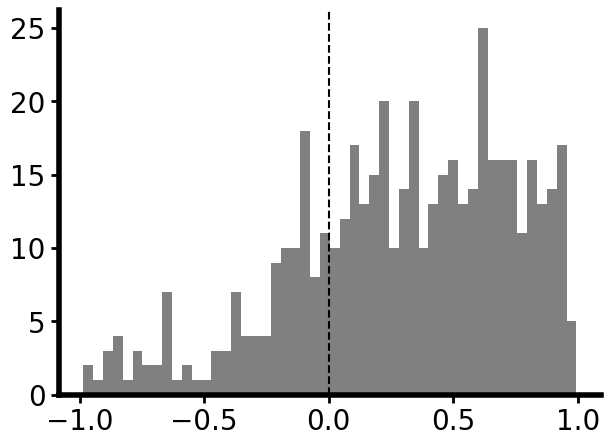

482
TtestResult(statistic=14.467527871187349, pvalue=1.2122512325649125e-39, df=481)
Predicted_Actual_correlation_nonzero_mean


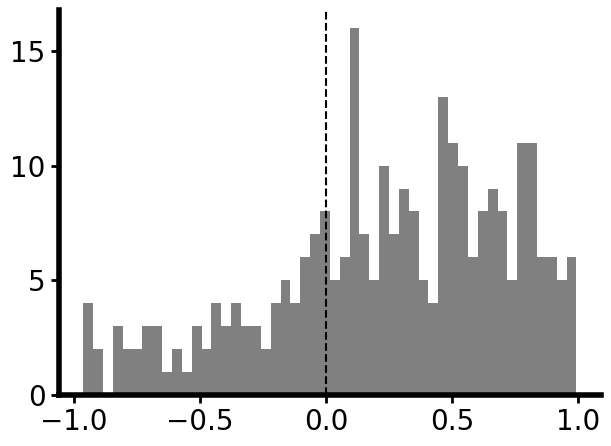

278
TtestResult(statistic=8.411302579335326, pvalue=2.1783632056902623e-15, df=277)
Predicted_Actual_correlation_nonzero_strict_mean


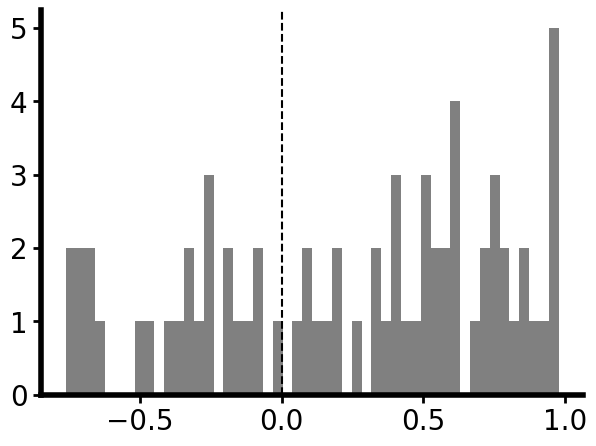

69
TtestResult(statistic=3.773632181739473, pvalue=0.00033998549645258353, df=68)


In [15]:
Poisson_regression=True
if Poisson_regression==True:
    addition='Poisson_'
else:
    addition=''
    
limited=False ##if true restricts lags to single trial, if false extends lags beyond this (see below)
if limited==True:
    addition2=''
else:
    addition2='_beyond'


use_tuned=True
bins=50
use_strict=False ##if true uses p=0.01 threshold for state tuning
phase_tuning=np.hstack(([np.load(Input_folder+'Phase_'+mouse_recday+'.npy')\
                         for mouse_recday in mouse_recdays_found]))
    

if use_strict==True:
    state_tuning=np.hstack(([np.load(Input_folder+'State_99'+mouse_recday+'.npy')\
                                     for mouse_recday in mouse_recdays_found]))    
else:
    state_tuning=np.hstack(([np.load(Input_folder+'State_95'+mouse_recday+'.npy')\
                                     for mouse_recday in mouse_recdays_found]))


neurons_tuned=state_tuning
###i.e. phase/state tuned neurons that have had non-zero betas calculated for atleast half of the sessions

plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True

for name in ['Predicted_Actual_correlation_mean','Predicted_Actual_correlation_nonzero_mean',\
 'Predicted_Actual_correlation_nonzero_strict_mean']:
    print(name)
    
    if use_tuned==True:
        
        corrs_allneurons=remove_nan(np.hstack(([np.load(Input_folder+addition2+addition+\
                                                        name+'_'+mouse_recday+'.npy') for mouse_recday in\
                                                mouse_recdays_found]))[neurons_tuned])
    else:

        
        corrs_allneurons=remove_nan(np.hstack(([np.load(Input_folder+addition2+addition+\
                                                        name+'_'+mouse_recday+'.npy') for mouse_recday in\
                                                mouse_recdays_found])))
        
    
        
    plt.hist(corrs_allneurons,bins=bins,color='grey')
    #plt.xlim(-1,1)
    plt.axvline(0,color='black',ls='dashed')
    plt.tick_params(axis='both',  labelsize=20)
    plt.tick_params(width=2, length=6)
    plt.savefig(Output_folder+addition+'GLM_analysis_'+name+'.svg',\
                bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    print(len(corrs_allneurons))
    print(st.ttest_1samp(corrs_allneurons,0))
    
